<a href="https://colab.research.google.com/github/gauravkinhikar97/Capstone-project-Hotel-Bookings-Analysis-By-Gaurav-Kinhikar-and-Amalkrishna-N/blob/main/Team_notebook_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data_frame = pd.read_csv('/content/drive/MyDrive/Almabetter/CAPSTONE-PROJECT-1-EDA/Hotel Bookings.csv')

In [ ]:
Data_df = Data_frame.copy()

In [ ]:
print(Data_df.shape)

(119390, 32)


In [ ]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Find out missing values

In [ ]:
Data_df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Data having four columns with null values then this colums has to fill with 0

In [ ]:
Data_df[['agent','company']] = Data_df[['agent','company']].fillna(0.0)


In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often)
Data_df['country'].fillna(Data_df.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
Data_df['children'].fillna(round(Data_df.children.mean()), inplace=True)

In [ ]:
## Drop Rows where there is no adult, baby and child
df = Data_df.drop(Data_df[(Data_df.adults+Data_df.babies+Data_df.children)==0].index)

# Let's see some Analysis On given Data

# 1. Resort Hotel v/s City Hotel


We have two types of hotel's Resort hotel and City hotel 
let's see via pie chart which type of hotel prefers a lot by guest's

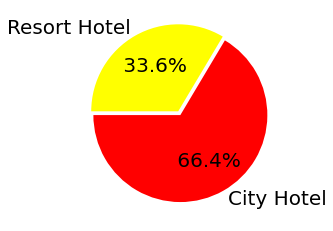

In [ ]:
labels = Data_df['hotel'].value_counts().index.tolist()
size = Data_df['hotel'].value_counts().tolist()
explode = (0,0.05)
colors = ['red', 'yellow']

plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%5.1f%%',startangle =180, textprops={'fontsize':20})
plt.show()

Most  Guests Prefer City Hotel over Resort Hotel 


#2. Cancelation and non cancelation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


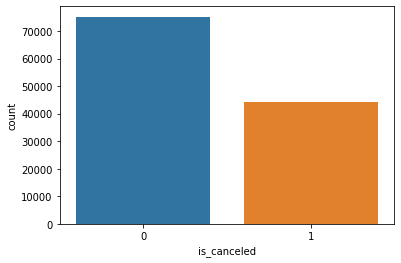

In [ ]:
sns.countplot('is_canceled',data = Data_df)

0 - is not canceled

1 - is canceled

#3. Which type hotel have high cancelations

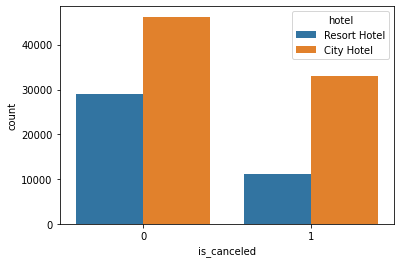

In [ ]:
sns.countplot(x=Data_df['is_canceled'],hue=Data_df['hotel'])

City hotel have high cancelations of bookings 

# 4. Countries with highest hotel bookings

Text(0.5, 0, 'country')

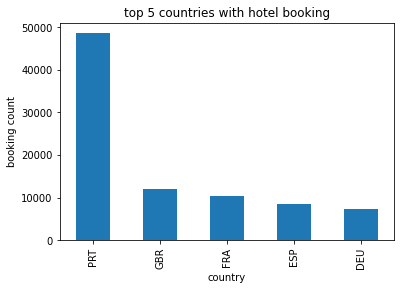

In [ ]:
country_df=Data_df['country'].value_counts()
top_5=country_df.head()
top_5.plot(kind='bar')

plt.title('top 5 countries with hotel booking')
plt.ylabel('booking count')
plt.xlabel('country')

PRT - Portugal

GBR - United Kingdom

FRA - France

ESP - Spain

DEU - Germany

Portugal is the country with highest hotel bookings 

# 5. which year booking is high and , which type of Hotel is engaged most with bookings

In [ ]:
Data_df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

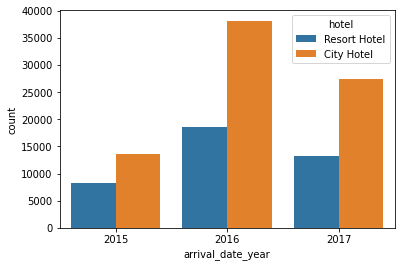

In [ ]:
sns.countplot(x=Data_df['arrival_date_year'],hue=Data_df['hotel'])

we have seen that in 2016 here is most number of guest and
In which guests prefer city hotel over resort hotel

#6. In which month booking rush is high

In [ ]:
Data_df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

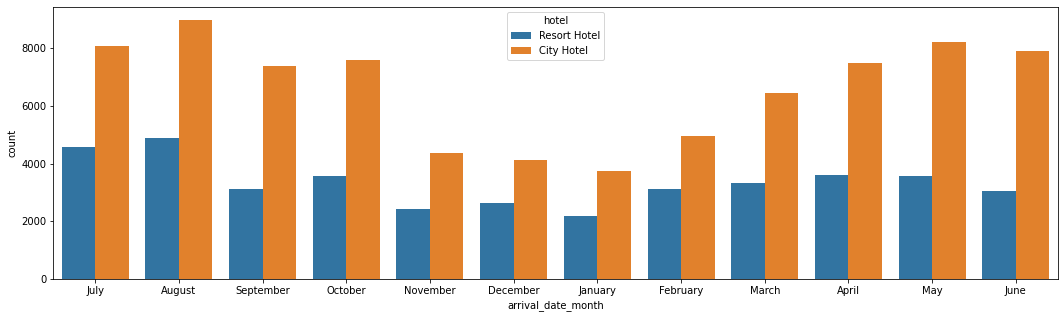

In [ ]:
sns.countplot(x=Data_df['arrival_date_month'],hue=Data_df['hotel'])
plt.rcParams['figure.figsize'] = (18, 5)

August is the most engaged months and also city hotel have the most guest's bookings

#7. Average daily rate of hotels

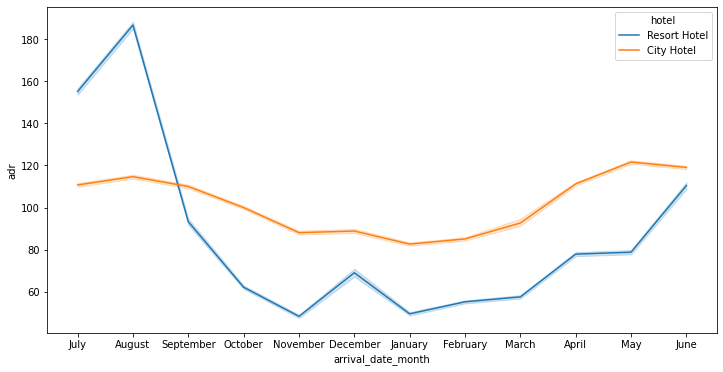

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=Data_df)

Here is guest's which have arrived daily in month august mostly


# 8. Analysis on market segmentation


In [ ]:
#counting number of booking through each market segment
market_seg=Data_df.groupby(['market_segment']).count()
market_seg

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
market_segment,,,,,,,,,,,,,,,,,,,,,
Aviation,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237
Complementary,743,743,743,743,743,743,743,743,743,743,...,743,743,743,743,743,743,743,743,743,743
Corporate,5295,5295,5295,5295,5295,5295,5295,5295,5295,5295,...,5295,5295,5295,5295,5295,5295,5295,5295,5295,5295
Direct,12606,12606,12606,12606,12606,12606,12606,12606,12606,12606,...,12606,12606,12606,12606,12606,12606,12606,12606,12606,12606
Groups,19811,19811,19811,19811,19811,19811,19811,19811,19811,19811,...,19811,19811,19811,19811,19811,19811,19811,19811,19811,19811
Offline TA/TO,24219,24219,24219,24219,24219,24219,24219,24219,24219,24219,...,24219,24219,24219,24219,24219,24219,24219,24219,24219,24219
Online TA,56477,56477,56477,56477,56477,56477,56477,56477,56477,56477,...,56477,56477,56477,56477,56477,56477,56477,56477,56477,56477
Undefined,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


visualisation  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


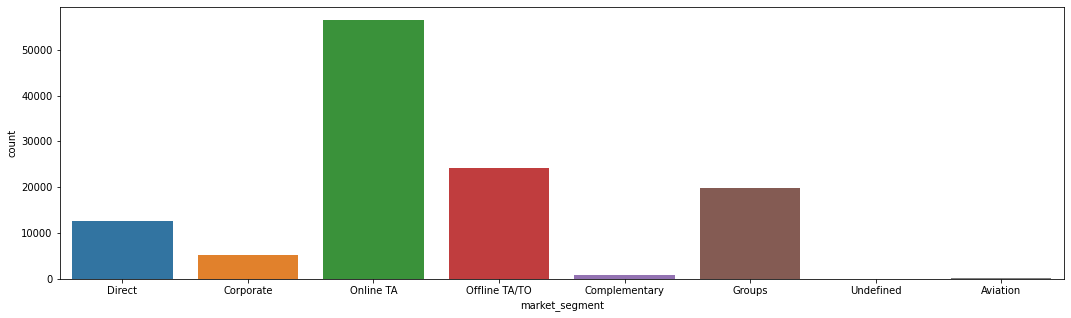

In [ ]:
# with graphical representation
sns.countplot('market_segment',data = Data_df)
plt.rcParams['figure.figsize'] = (10, 5)

 Here is most of the bookings were done through online TA

Generally transient types (it means for a short time ) of repeated guests mostly visited in hotel 

# 9.  reservation between hotels



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


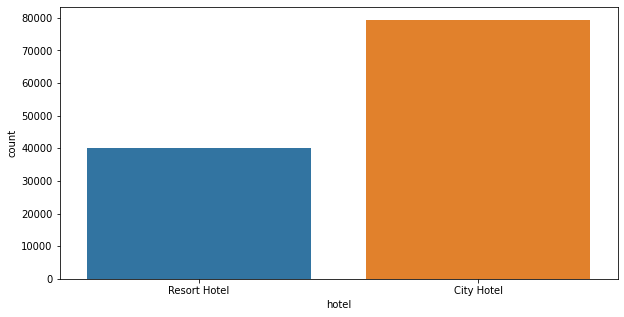

In [ ]:
sns.countplot('hotel',data = Data_df)
plt.rcParams['figure.figsize'] = (10,10)

#city hotel is higher in numbers for reservations

**analysis on Reservation Status:-**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


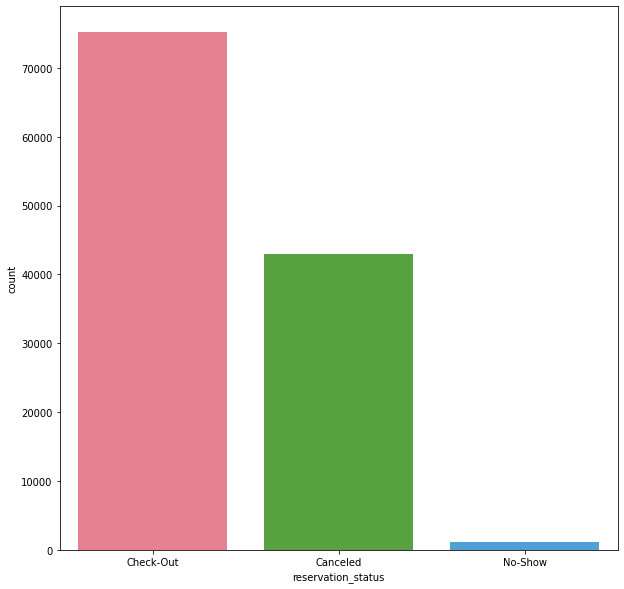

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(Data_df['reservation_status'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()


#10.  most special requests from which type of guest

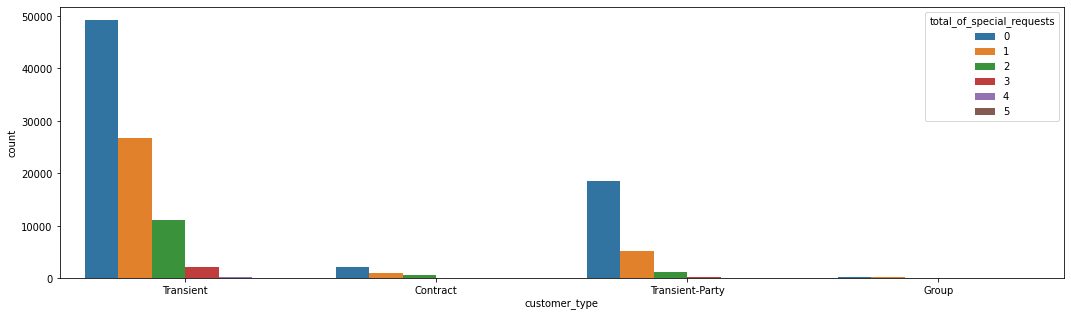

In [ ]:
sns.countplot(x=Data_df['customer_type'],hue=Data_df['total_of_special_requests'])
plt.rcParams['figure.figsize'] = (18, 5)

# **11. correlation heatmap**

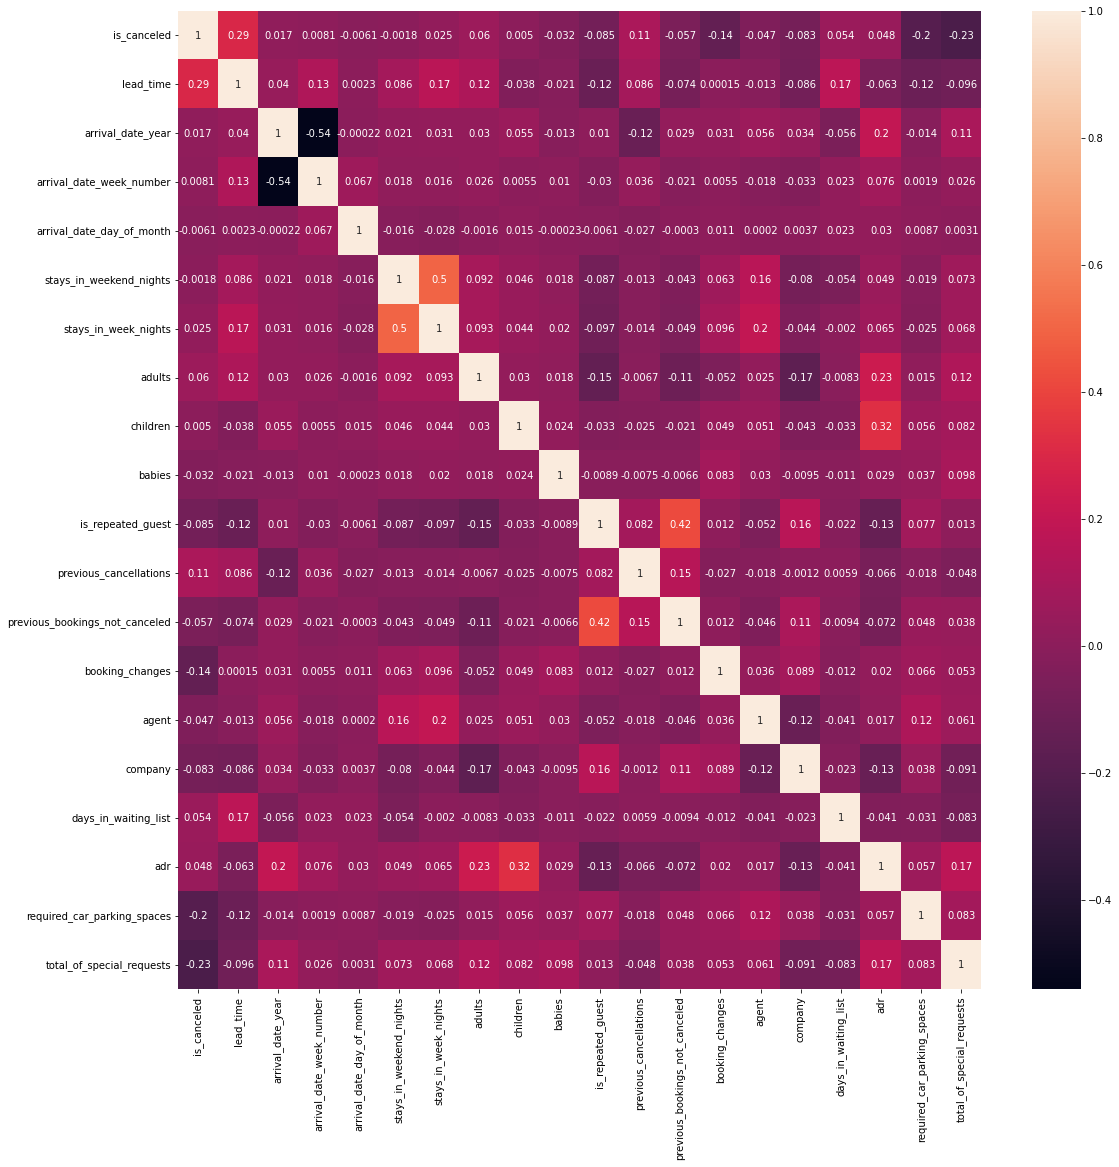

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(Data_df.corr(),annot=True)

# SUMMARY

So , here is we have done this project of hotel booking analysis by Gaurav kinhikar and Amalkrishna N 
we first have to import all the libraries that is essencial then have to make a data restoration of csv. file in a drive then after cleaning some data and after that we have done the Exploration on this Data 
 we have done some deep analysis on guests for hotel bookings 

# Conclusion

Most Guests Prefer City Hotel over Resort Hotel

Portugal is the country with highest hotel bookings

we have seen that in 2016 most hotel bookings are done and more rushes in city hotel

August is the most engaged month and also city hotel have the more bookings


Here is most of the bookings were done through online TA ie,Online mode of market segment gives more bookings

reservations are also higher in city hotels

Transient type of peoples is made more special requests

Repeated guests do not make much booking cancellations. And also, when the lead time increases chances of cancellations also increases

